In [1]:
# Sistemas de recomendacion

import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [3]:
ratings=pd.read_csv('data/movie_ratings.csv').set_index('Movie')
ratings.head()

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Aquaman,4,1,2,2,2
Avengers: Infinity War,2,5,2,5,5
Black Panther,5,2,5,1,1
Bohemian Rhapsody,2,3,4,4,1
Deadpool 2,3,2,4,5,1


In [6]:
ratings.index

Index(['Aquaman', 'Avengers: Infinity War', 'Black Panther',
       'Bohemian Rhapsody', 'Deadpool 2',
       'Fantastic Beasts: The Crimes of Grindelwald', 'Incredibles 2',
       'Jurassic World: Fallen Kingdom', 'Mission: Impossible – Fallout',
       'Venom'],
      dtype='object', name='Movie')

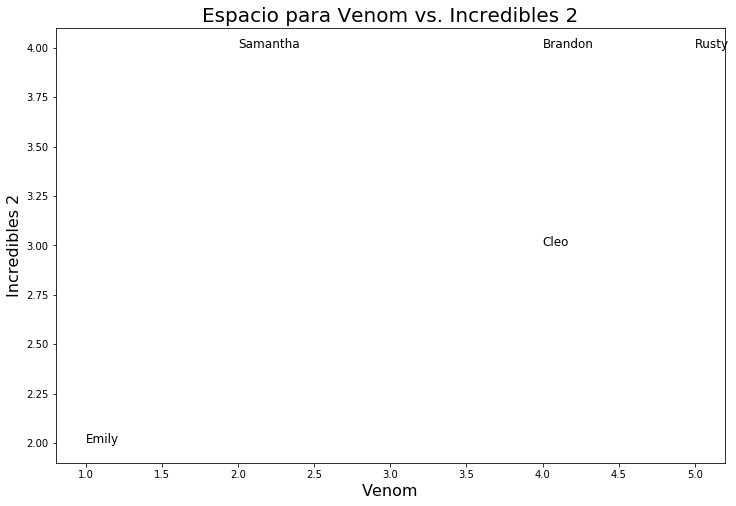

In [9]:
def plot(m1, m2):
    x=ratings.T[m1]
    y=ratings.T[m2]
    n=list(ratings.T.index)
    
    fig, ax=plt.subplots()
    ax.scatter(x, y, s=0)
    fig.set_figheight(8)
    fig.set_figwidth(12)
    
    plt.title('Espacio para {} vs. {}'.format(m1, m2), fontsize=20)
    ax.set_xlabel(m1, fontsize=16)
    ax.set_ylabel(m2, fontsize=16)
    
    for i,e in enumerate(n):
        ax.annotate(e, (x[i], y[i]), fontsize=12)

plot('Venom', 'Incredibles 2')

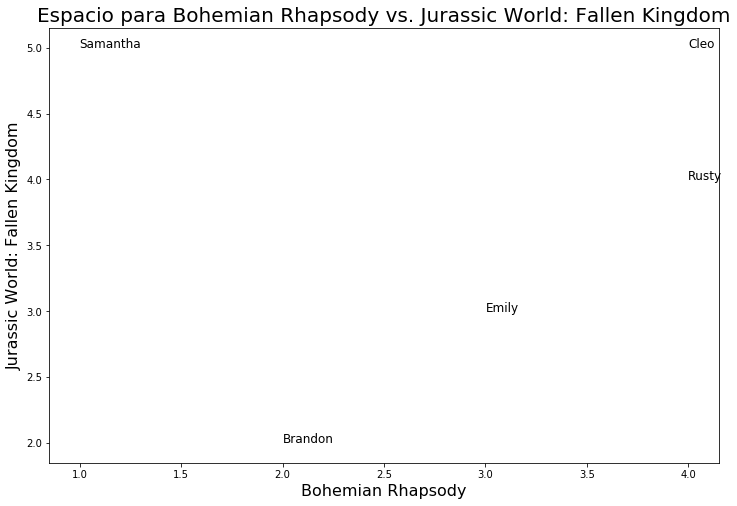

In [10]:
plot('Bohemian Rhapsody', 'Jurassic World: Fallen Kingdom')

In [11]:
distancias=squareform(pdist(ratings.T, 'euclidean'))
distancias

array([[0.        , 6.63324958, 6.        , 7.41619849, 7.48331477],
       [6.63324958, 0.        , 6.92820323, 6.40312424, 5.09901951],
       [6.        , 6.92820323, 0.        , 5.56776436, 8.24621125],
       [7.41619849, 6.40312424, 5.56776436, 0.        , 6.70820393],
       [7.48331477, 5.09901951, 8.24621125, 6.70820393, 0.        ]])

In [12]:
similitud=pd.DataFrame(1/(1+distancias), index=ratings.columns, columns=ratings.columns)
similitud

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878
Emily,0.131006,1.000000,0.126132,0.135078,0.163961
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000


In [13]:
# difirentes tipos de distancias

%matplotlib inline
import scipy.spatial.distance as distance
import numpy as np
import math

In [14]:
def dot(v1, v2):
    return sum(map(lambda x: x[0]*x[1], zip(v1,v2)))

In [15]:
def similitud_coseno(v1, v2):
    prod=dot(v1, v2)
    len1=math.sqrt(dot(v1, v1))
    len2=math.sqrt(dot(v2, v2))
    return prod/(len1*len2)

In [23]:
def plot_v(v):
    origen=(0,0)
    #plt.figure(figsize=(10,5))
    plt.quiver(*origen, v[0,0], v[0,1], color=['r'], scale=60)
    plt.quiver(*origen, v[1,0], v[1,1], color=['b'], scale=60)
    a=v[0]
    b=v[1]
    sim_cos=similitud_coseno(a, b)
    sim_euc=distance.euclidean(a, b)
    tit='Coseno: {}, Euclidea: {}'.format(sim_cos.round(2), sim_euc.round(2))
    plt.title(tit)
    plt.grid()
    plt.legend(['A', 'B'])

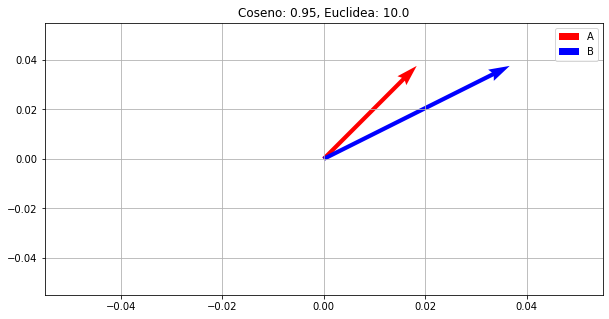

In [21]:
v=np.array([[10,10], [20, 10]])
plot_v(v)

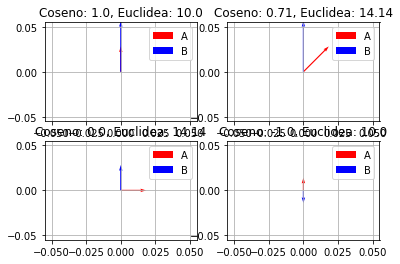

In [24]:
# caso 1
v=np.array([[0,10], [0, 20]])
plt.subplot(2,2,1)
plot_v(v)

# caso 2
v=np.array([[10,10], [0, 20]])
plt.subplot(2,2,2)
plot_v(v)

# caso 3
v=np.array([[10,0], [0, 10]])
plt.subplot(2,2,3)
plot_v(v)

# caso 4
v=np.array([[0,5], [0, -5]])
plt.subplot(2,2,4)
plot_v(v)

In [25]:
# generando una recomendacion
tom={'Aquaman':2, 'Avengers: Infinity War':1, 'Black Panther':5,
       'Bohemian Rhapsody':5, 'Deadpool 2':2,
       'Fantastic Beasts: The Crimes of Grindelwald':3, 'Incredibles 2':3,
       'Jurassic World: Fallen Kingdom':4, 'Mission: Impossible – Fallout':3,
       'Venom':3}

In [26]:
ratings['Tom']=pd.Series(tom)
distancias=squareform(pdist(ratings.T, 'euclidean'))
similitud=pd.DataFrame(1/(1+distancias), index=ratings.columns, columns=ratings.columns)
similitud

,Brandon,Emily,Cleo,Rusty,Samantha,Tom
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878,0.156613
Emily,0.131006,1.000000,0.126132,0.135078,0.163961,0.135078
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152,0.217129
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732,0.126132
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000,0.116961
Tom,0.156613,0.135078,0.217129,0.126132,0.116961,1.000000


In [27]:
similitud.Tom.sort_values(ascending=False)[1:]

Cleo        0.217129
Brandon     0.156613
Emily       0.135078
Rusty       0.126132
Samantha    0.116961
Name: Tom, dtype: float64

In [28]:
n_ratings=pd.read_csv('data/movie_ratings2.csv').set_index('Movie')

In [29]:
simil_score=similitud.Tom.sort_values(ascending=False)[1:]
reco=n_ratings.copy()

In [30]:
for n,s in dict(simil_score).items():
    reco[n]=reco[n]*s

In [31]:
reco['Total']=reco.sum(axis=1)
reco.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Despicable Me 3,0.626452,0.675391,1.085646,0.126132,0.233923,2.747544
Wonder Woman,0.626452,0.405234,0.868517,0.378396,0.467845,2.746445
Thor: Ragnarok,0.626452,0.405234,0.868517,0.126132,0.584807,2.611142
Guardians of the Galaxy Vol. 2,0.626452,0.135078,1.085646,0.504528,0.233923,2.585627
Jumanji: Welcome to the Jungle,0.626452,0.405234,0.651388,0.252264,0.584807,2.520145
Spider-Man: Homecoming,0.156613,0.405234,1.085646,0.252264,0.584807,2.484564
Wolf Warrior 2,0.783065,0.405234,0.434259,0.378396,0.467845,2.468799
Beauty and the Beast,0.313226,0.675391,0.434259,0.630660,0.233923,2.287458
Star Wars: The Last Jedi,0.783065,0.540312,0.217129,0.252264,0.233923,2.026693


In [32]:
# https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

# coseno
distancias=squareform(pdist(ratings.T, 'cosine'))
similitud=pd.DataFrame(1/(1+distancias), index=ratings.columns, columns=ratings.columns)
simil_score=similitud.Tom.sort_values(ascending=False)[1:]
reco=n_ratings.copy()
for n,s in dict(simil_score).items():
    reco[n]=reco[n]*s
reco['Total']=reco.sum(axis=1)
reco.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Wonder Woman,3.615951,2.511274,3.809728,2.532334,3.168375,15.637662
Despicable Me 3,3.615951,4.185457,4.762161,0.844111,1.584187,14.991867
Thor: Ragnarok,3.615951,2.511274,3.809728,0.844111,3.960468,14.741533
Wolf Warrior 2,4.519939,2.511274,1.904864,2.532334,3.168375,14.636786
Jumanji: Welcome to the Jungle,3.615951,2.511274,2.857296,1.688222,3.960468,14.633212
Guardians of the Galaxy Vol. 2,3.615951,0.837091,4.762161,3.376445,1.584187,14.175835
Spider-Man: Homecoming,0.903988,2.511274,4.762161,1.688222,3.960468,13.826113
Beauty and the Beast,1.807976,4.185457,1.904864,4.220556,1.584187,13.703040
Star Wars: The Last Jedi,4.519939,3.348365,0.952432,1.688222,1.584187,12.093146


In [33]:
# cityblock
distancias=squareform(pdist(ratings.T, 'cityblock'))
similitud=pd.DataFrame(1/(1+distancias), index=ratings.columns, columns=ratings.columns)
simil_score=similitud.Tom.sort_values(ascending=False)[1:]
reco=n_ratings.copy()
for n,s in dict(simil_score).items():
    reco[n]=reco[n]*s
reco['Total']=reco.sum(axis=1)
reco.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Wonder Woman,0.2500,0.166667,0.4,0.176471,0.20,1.193137
Despicable Me 3,0.2500,0.277778,0.5,0.058824,0.10,1.186601
Guardians of the Galaxy Vol. 2,0.2500,0.055556,0.5,0.235294,0.10,1.140850
Thor: Ragnarok,0.2500,0.166667,0.4,0.058824,0.25,1.125490
Spider-Man: Homecoming,0.0625,0.166667,0.5,0.117647,0.25,1.096814
Jumanji: Welcome to the Jungle,0.2500,0.166667,0.3,0.117647,0.25,1.084314
Wolf Warrior 2,0.3125,0.166667,0.2,0.176471,0.20,1.055637
Beauty and the Beast,0.1250,0.277778,0.2,0.294118,0.10,0.996895
Star Wars: The Last Jedi,0.3125,0.222222,0.1,0.117647,0.10,0.852369
